
# Migle  Kasetaite - Student id : 21-733-779

# Nidhi Agrawal - Student id : 21-717-673


# Practical 3: MNIST

This is the first task of Practical 3. Your task is to build a (convolutional) neural network to classify the handwritten digits from the MNIST dataset (http://yann.lecun.com/exdb/mnist/). 

You should get an accuracy of **at least 97%** to pass the practical. 

You should save and upload your model to the seafile link we provided to you. Please name the model file as `{repository_name}-MNIST.h5`. For example, if your repository is FDS21-M0, you should name the model file as `FDS21-M0-MNIST.h5`

## Import the libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [12]:
tf.__version__

'2.7.0'

In [13]:
tf.keras.__version__

'2.7.0'

## Prepare the dataset

In this block, you will prepare the data for the training, such as normalisation. 

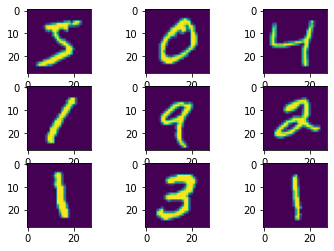

(60000, 28, 28)

In [26]:
from keras.datasets import mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train_full[i])
plt.show()

X_train_full.shape

## Build and train the model

Build and train your model. 

In [27]:
# TODO: Build your model

# reshape dataset to have a single channel
X_train_full = X_train_full.reshape((X_train_full.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# normalisation
X_train_full = X_train_full/255.0
X_test = X_test/255.0

np.random.seed(42) # we set the random seed to make sure everytime the data is shuffled in the same way
shuffled_indices = np.random.permutation(X_train_full.shape[0])
X_valid, X_train = X_train_full[shuffled_indices[:5000]], X_train_full[shuffled_indices[5000:]]
y_valid, y_train = y_train_full[shuffled_indices[:5000]], y_train_full[shuffled_indices[5000:]]



In [28]:

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=7, activation="relu", kernel_initializer='he_uniform', padding="same", input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(), # starting fully connected layers
    keras.layers.Dense(128, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax")
])


In [29]:
# show the structure of your model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 12544)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               1605760   
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                      

In [30]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, batch_size=32, epochs=5,validation_data=(X_valid, y_valid), 
                    callbacks=[early_stopping_cb])

Epoch 1/5
1719/1719 [==============================] - 87s 51ms/step - loss: 0.2433 - accuracy: 0.9269 - val_loss: 0.0548 - val_accuracy: 0.9840
Epoch 2/5
1719/1719 [==============================] - 84s 49ms/step - loss: 0.0785 - accuracy: 0.9779 - val_loss: 0.0472 - val_accuracy: 0.9860
Epoch 3/5
1719/1719 [==============================] - 84s 49ms/step - loss: 0.0528 - accuracy: 0.9845 - val_loss: 0.0502 - val_accuracy: 0.9854
Epoch 4/5
1719/1719 [==============================] - 84s 49ms/step - loss: 0.0418 - accuracy: 0.9882 - val_loss: 0.0579 - val_accuracy: 0.9860
Epoch 5/5
1719/1719 [==============================] - 84s 49ms/step - loss: 0.0324 - accuracy: 0.9905 - val_loss: 0.0469 - val_accuracy: 0.9866


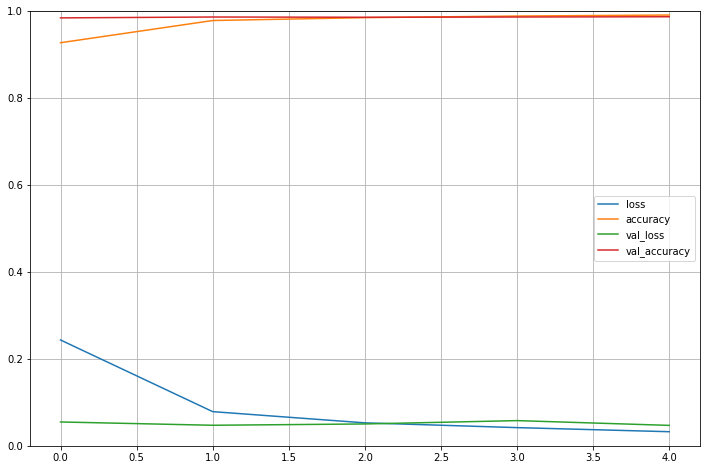

In [31]:
# Assume you have stored the training history in the variable "history"
# Show the learning curves
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

## Save the model

Save and upload your trained model to the seafile link we provided to you. You can upload it multiple times. We will consider only the newest uploaded model. 

In [32]:
model.save('FDS21-M90-MNIST.h5') # change the file name according to your repository name

## Load the model and evaluate it on the test data

In [33]:
model = keras.models.load_model("FDS21-M90-MNIST.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.0350 - accuracy: 0.9888


[0.03500066697597504, 0.9887999892234802]

## Short report

Please write a few sentences explaining how you build and train the model. Please include the decisions you made, such as why you use x number layers, and the difficulties you met. 

1. After loading the dataset, we reshaped it to get one channel. 
2. Since we use sparse_categorical_crossentropy as loss, we did not one-hot encode the data labels. 
3. For normalizing the data, we divided each data point by 255 as RGB pixel value ranges from 0 to 255.
4. Next, we split our train dataset into train and validation datasets.
5. We build a sequential model so that it follows one layer after the other as per the layers below:
    - first one is the convolutional layer (used for extracting image features)
    - next is a maxpooling layer (required to down sample the detection of features in feature maps)
    - next is Flatten layer (to convert the data into a 1-D array as a single feature vector)
    - next we used two Dense (one with 128 and the other with 64 neurons) and two Droupout layers alternatively. Droupout layer is used as a regularizer to avoid overfitting.
    - The last Dense layer is the output layer which uses softmax function.    
6. For compiling the model, we tried SGD as well as Adam optimizers. SGD gave us around 92% accuracy on test data whereas Adam gave 98.8% test accuracy. Therefore, we decided to use Adam.
7. We used training batch size of 32 and 5 epochs to fit our model as we achieved required accuracy within 5 epochs.

The most difficult part was to decide the number and types of layers. We tried adding different number of convolutional and dense layers, also different batch sizes, but it did not increase the accuracy and was very time consuming. 
